Name Ihunwo Owhonda

Labpartner(s)

In [ ]:
#import statements go here
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Class 12.1

# Warmups 12.1

Note: finish this for lab if you don't finish in class.

Log into the Supermike III LSU HPC using ssh (in the terminal)

**W.1.** Last time we went over the following basic unix/linux commands:
- ls
- pwd
- cd
- scp
- scp -r

What do each of these do? If you forgot, you can type "man ls", etc. to see the documentation.

ls: Lists the files and directories within a directory.

When you type ls, it will display the contents of the current directory.
Common options:
ls -l: Lists files in long format, showing details like permissions, owner, size, and modification date.
ls -a: Lists all files, including hidden files (those starting with a .).
pwd (Print Working Directory): Displays the full path of the current directory.

This command is useful for confirming your current location in the filesystem.
cd (Change Directory): Changes the current working directory.

Syntax: cd <directory_path>.
Examples:
cd /home/user: Changes to the specified directory.
cd ..: Moves up one directory level.
cd ~ or just cd: Moves to your home directory.
scp (Secure Copy): Transfers files between a local machine and a remote machine over SSH.

Syntax: scp source_file user@host:destination_path.
Examples:
scp myfile.txt user@remote_host:/home/user/: Copies myfile.txt from your local machine to the specified path on the remote machine.
scp user@remote_host:/home/user/remote_file.txt .: Copies remote_file.txt from the remote machine to the current local directory.
scp -r: Recursively copies entire directories between local and remote systems.

Syntax: scp -r source_directory user@host:destination_path.
This option is especially useful when transferring multiple files within a directory or an entire folder structure.

**W.2** Navigate to your /work/user directory on mike. Move a copy of your final project proposal from your computer to your work directory and submit a screen shot of this directory with the file with your lab.

**W.3** Look up the LSU HPC documentation for /work and /home, what is the difference? What are the quotas for each? How long will files last? Are they backed up?

Storage Purpose and Quotas


- /home: Persistent storage for user-specific files, intended for job input, output, and related data files. There's no explicit quota mentioned, but files may be subject to purge ¹.
- /work: Shared storage for job input, output, and related data files, with quotas in place. Users will receive weekly email notifications if utilization exceeds allocated space ².


File Retention and Backup


- /home: Files are not backed up and may be subject to purge.
- /work: Files are also not backed up and may be purged when disk space becomes limited.

# Lecture 12.1

### Agenda:


Some useful things to do with a timeseries
- datetime objects
- basic line fitting
- moving averages
- detrending

#### Datetime Objects in python and pandas

Python has a wonderful feature called datetime objects. These are super-useful if you are dealing with any data that has a timestamp. They are a bit tricky to get used to, but worth the effort, and the alternatives are usually much more painful (trust me on this one). 

Documentation: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html

There is a lot you can do with these. Here we will just cover the basics. Dig in to the documentation if you need something specfic.

Note that Victoria used these in her sample code to make movie frames for HYCOM data: https://github.com/chsharrison/Sci_comp_F24/blob/main/Course_materials/movie_demo_2024.ipynb

In [2]:
from datetime import datetime, timedelta
import pandas as pd

#### Defining a specfic date

In [4]:
date1 = datetime(1996,1,1) 

In [6]:
# this is a datetime object
date1

datetime.datetime(1996, 1, 1, 0, 0)

In [8]:
# print out the date
print(date1)

1996-01-01 00:00:00


In [10]:
# you can also format the date as a string however you like (useful for plots)
date1.strftime("%m/%d/%Y")

'01/01/1996'

In [12]:
# defining a date with hours, minutes and seconds
date2 = datetime(1996,1,1, 13, 34, 6) # note using 24 clock (miltary time) here

In [14]:
print(date2)

1996-01-01 13:34:06


In [16]:
#what is going to happen here?
date2.strftime("%m-%d-%Y")

'01-01-1996'

In [206]:
date1.today() #somehow it knows what timezone I am (probably from my computer)

datetime.datetime(2024, 11, 12, 15, 30, 36, 783774)

#### If we want to increment the date we can use timedelta

In [20]:
date1 = date1 + timedelta(days=1)
print(date1)

1996-01-02 00:00:00


In [22]:
date1 = date1 + timedelta(minutes = 2, seconds=1)
print(date1)

1996-01-02 00:02:01


In [24]:
# you can also do things like add fractional days
date1 = date1 + timedelta(days=1.5)
print(date1)

1996-01-03 12:02:01


We can find the time difference between two dates

In [208]:
timediff = date2-date1
timediff

datetime.timedelta(days=-2, seconds=5525)

#### We can also define timeseries using pandas 

In [28]:
pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize: 'bool' = False,
    name: 'Hashable | None' = None,
    inclusive: 'IntervalClosedType' = 'both',
    *,
    unit: 'str | None' = None,
    **kwargs,
) -> 'DatetimeIndex'
Docstring:
Return a fixed frequency DatetimeIndex.

Returns the range of equally spaced time points (where the difference between any
two adjacent points is specified by the given frequency) such that they all
satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
the first and last time points in that range that fall on the boundary of ``freq``
(if given as a frequency string) or that are valid for ``freq`` (if given as a
:class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
``end``, or ``freq`` is *not* specified, this missing parameter can be computed
given ``periods``, the number of timesteps in the range. See the note below.)

Parameters
----------
st

In [30]:
# note the default is daily
my_daterange = pd.date_range(start='1/1/2018', end='1/08/2018')

In [32]:
my_daterange

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [220]:
my_dr2 = pd.date_range(start='1/26/1986', end='11/12/2024')

In [222]:
my_dr2

DatetimeIndex(['1986-01-26', '1986-01-27', '1986-01-28', '1986-01-29',
               '1986-01-30', '1986-01-31', '1986-02-01', '1986-02-02',
               '1986-02-03', '1986-02-04',
               ...
               '2024-11-03', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
               '2024-11-11', '2024-11-12'],
              dtype='datetime64[ns]', length=14171, freq='D')

In [34]:
# this can be indexed like any array
my_daterange[0]
# note the result is a timestamp, which is similar to a datetime object, but not exactly

Timestamp('2018-01-01 00:00:00')

In [36]:
print(my_daterange[1])

2018-01-02 00:00:00


In [38]:
# you can convert a datetime to a timestamp
pd.Timestamp(datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [40]:
# we can also specfiy the frequency
my_daterange2 = pd.date_range(start='1/1/2018',end = '1/1/2021', freq='ME')
my_daterange2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='ME')

See the documentation for lots more functionality

### Working with timeseries data: global sea surface temperature (SST)

We are going to be using some data from the epa website here: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

This is globally averaged Extended Reconstructed Sea Surface Temperature (ERSST)v.4 from NOAA, which combines satilite, ship and other in situ (in place, i.e. in the water) data. If you follow the links on the above you can get the gridded (i.e. map) product in netcdf format for the latest product (v.5). We are just going to play around with the globally averaged data

In [123]:
sst= pd.read_csv('sea-surface-temp_fig-1.csv')

In [192]:
https://www.epa.gov/system/files/other-files/2024-06/sea-surface-temp_fig-1.csv

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3531000717.py, line 1)

In [200]:
sst2= pd.read_csv('https://www.epa.gov/system/files/other-files/2024-06/sea-surface-temp_fig-1.csv',
                encoding = 'latin1')

In [202]:
sst2

,"Figure 1. Average Global Sea Surface Temperature, 1880-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Source: EPA's Climate Change Indicators in the...,NaN,NaN,NaN
1,"Data source: NOAA, 2024",NaN,NaN,NaN
2,Web update: June 2024,NaN,NaN,NaN
3,Units: temperature anomaly (°F),NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
145,2019,0.878,0.822,0.935
146,2020,0.846,0.804,0.888
147,2021,0.668,0.622,0.714
148,2022,0.743,0.701,0.786


In [196]:
sst

,"Figure 1. Average Global Sea Surface Temperature, 1880-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Source: EPA's Climate Change Indicators in the...,NaN,NaN,NaN
1,"Data source: NOAA, 2024",NaN,NaN,NaN
2,Web update: June 2024,NaN,NaN,NaN
3,Units: temperature anomaly (°F),NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
145,2019,0.878,0.822,0.935
146,2020,0.846,0.804,0.888
147,2021,0.668,0.622,0.714
148,2022,0.743,0.701,0.786


In [127]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                 index_col = 0, # this makes the year the index
                  header = 6,
                 #skiprows = [0,1,2,3,4,5], # this works too, need to skip all the comments
                 encoding ='latin1' # had to do this to get it to work, thanks stack exchange
                )

In [129]:
sst

,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
Year,,,
1880,-0.470009,-0.672646,-0.267371
1881,-0.356879,-0.560588,-0.153169
1882,-0.372661,-0.575728,-0.169594
1883,-0.448443,-0.650804,-0.246082
1884,-0.589754,-0.790478,-0.389030
...,...,...,...
2011,0.428674,0.133289,0.724058
2012,0.528696,0.232869,0.824523
2013,0.584674,0.289227,0.880122


<Axes: xlabel='Year'>

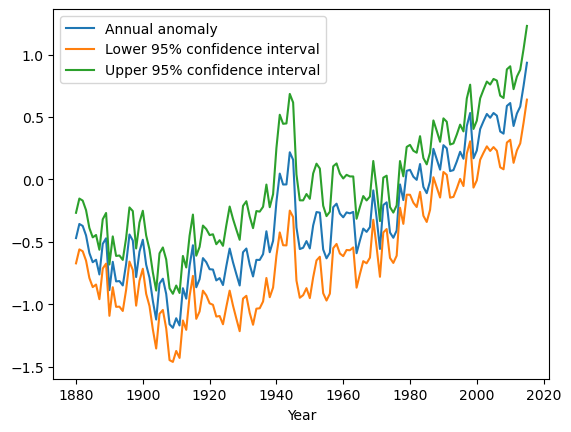

In [131]:
sst.plot()

In [133]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [13.0, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

<Axes: xlabel='Year'>

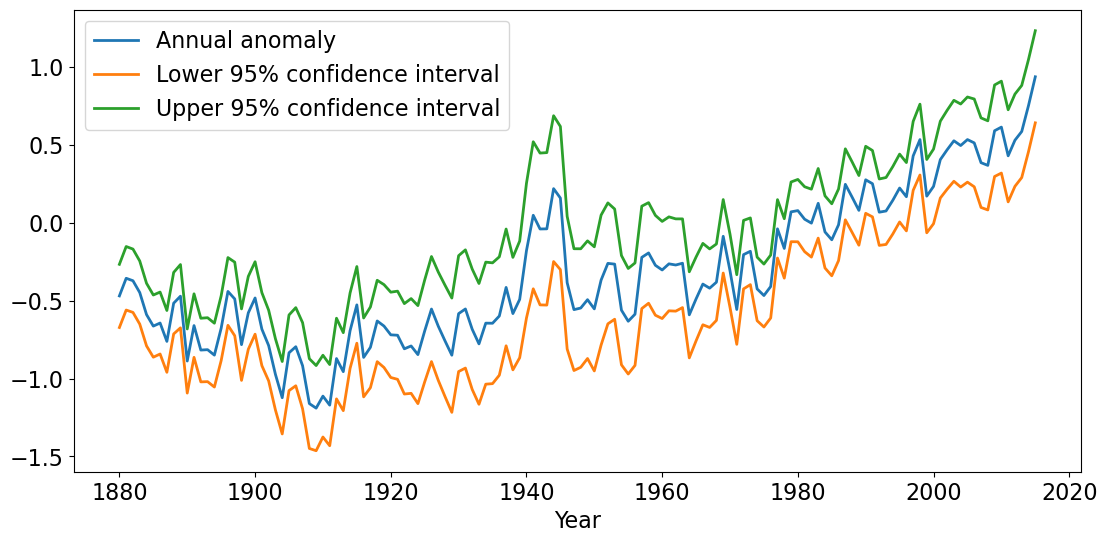

In [135]:
sst.plot()

1850 is usually considered the beginning of the industrial revolution, so before human affected climate by burning fossil fuels (but we did major land use changes and had impacts on many species' extinctions)

There is a definate trend in the data, with a big excursion in the 1940s

Let's ask some research questions. We will start these in lecture and you will finish them in lab:
- What is the trend in this data, that is how fast is SST increasing with time? 
- If we choose a different window for the trend analysis, how does this affect the answer?
- What causes all the interannual variablilty? If we detrend the data how does it look? Can we compare this with climate variabiltiy indices?
- What happened in the 1940s?

see: https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/

I am much more comfortable doing data analysis in xarray so I'm converting the pandas dataframe to an xarray dataset

In [137]:
import xarray as xr

In [139]:
sst_ds = sst.to_xarray()

In [141]:
sst_ds

<xarray.Dataset>
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 -0.2674 -0.1532 ... 1.231

If we want, we can add a pandas date range to this timeseries and use this for plotting. Not super needed here because it's annual, but would be useful if it was monthly or daily.

In [143]:
ssha_dates = pd.date_range(start = '1880', end = '2015', freq='YE')

In [145]:
ssha_dates

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=135, freq='YE-DEC')

In [147]:
# let's just work with the annual anomaly

sst_ds["Annual anomaly"] # note a lot of the syntax in xarray is similar to pandas

<xarray.DataArray 'Annual anomaly' (Year: 136)>
array([-0.4700088, -0.3568788, -0.3726612, -0.448443 , -0.5897538,
       -0.6636546, -0.6439392, -0.7616232, -0.5166342, -0.4717926,
       -0.8875836, -0.6603264, -0.8173098, -0.8148276, -0.84978  ,
       -0.6772536, -0.4412844, -0.4894326, -0.78255  , -0.578736 ,
       -0.4833054, -0.6831072, -0.7883226, -0.9732618, -1.123038 ,
       -0.8347986, -0.795843 , -0.917685 , -1.160703 , -1.189773 ,
       -1.112769 , -1.1706066, -0.8718498, -0.9557658, -0.6931926,
       -0.5274864, -0.8644752, -0.7996338, -0.6306858, -0.6633414,
       -0.7196544, -0.7222464, -0.8093034, -0.7910208, -0.8465382,
       -0.6946722, -0.554238 , -0.6640884, -0.7589772, -0.8502282,
       -0.5835816, -0.5537106, -0.683568 , -0.7777674, -0.6447312,
       -0.6452784, -0.5988258, -0.4155462, -0.5834772, -0.4924098,
       -0.1797678,  0.0471582, -0.0406296, -0.039807 ,  0.2180826,
        0.157752 , -0.3853548, -0.5579568, -0.5477346, -0.4941792,
       -0.5531796, -0.368496 , -0.2612952, -0.2661372, -0.5613282,
       -0.632412 , -0.5871312, -0.2226618, -0.1943208, -0.2735424,
       -0.3035772, -0.2642508, -0.2717028, -0.260397 , -0.5913306,
       -0.489249 , -0.39411  , -0.4203576, -0.38187  , -0.0876366,
       -0.3086334, -0.5571756, -0.2051676, -0.1836738, -0.4251924,
       -0.4675428, -0.4096278, -0.0397692, -0.165393 ,  0.0692586,
        0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 2011 2012 2013 2014 2015

#### Let's do a linear fit of the whole timeseries

Linear regression is simply fitting a line to some data, assuming that the data is on a straight line with the equation y=**m**x+**b**, where x and y are the independent and dependent data, **m** is the slope, and **b** is the intercept. Linear regression finds m and b by minimizing the distance of all the data points to a line, getting the best fit, using calculus. See:

https://plainenglish.io/blog/linear-regression-for-dummies

https://en.wikipedia.org/wiki/Linear_regression


In [149]:
from scipy import stats

In [151]:
stats.linregress?

Signature: stats.linregress(x, y=None, alternative='two-sided')
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension. In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis. Default is 'two-sided'.
    The following options are available:

    * 'two-sided': the slope of the regression line is nonzero
    * 'less': the slope of the regression line is less than zero
    * 'greater':  the slope of the regression line is greater than zero

    .. versionadded:: 1.7.

In [155]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_entire = stats.linregress(sst_ds.Year, sst_ds["Annual anomaly"])

In [157]:
ssta_trend_entire

LinregressResult(slope=0.010013503267496782, intercept=-19.822035179626454, rvalue=0.8362694544139663, pvalue=8.796275453011977e-37, stderr=0.0005671794277975704, intercept_stderr=1.104806345521059)

In [159]:
ssta_trend_entire.slope

0.010013503267496782

The value I am interested in is the slope, what is this? What are the units?
- Rate that temperature is increasing (degrees F/Year)

Let's plot the line to see the fit. The equation is y = mx + b, where m is the slope and b is the intercept, what are x and y in this case?
- x is time
- y is temprature

In [161]:
import matplotlib.pyplot as plt

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\owhon\AppData\Local\Temp\ipykernel_6440\1318780478.py:4: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('SSTA ($\degree$F)')


Text(0, 0.5, 'SSTA ($\\degree$F)')

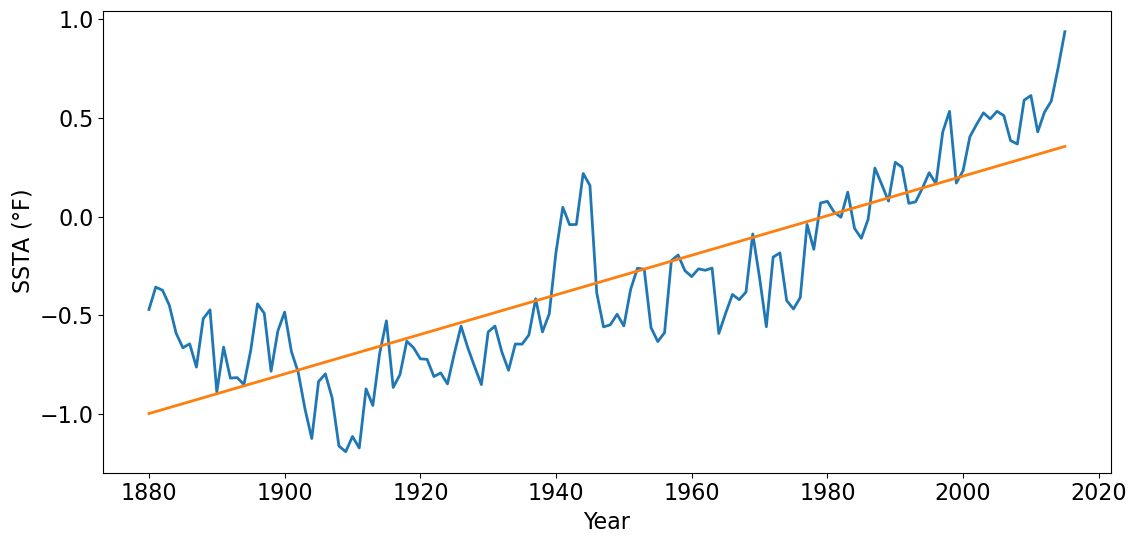

In [163]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

How good of a fit is this for the last few decades?
It's not so good, the trend is faster, steeper

#### Let's do a linear fit for the last few decades and see what we get.

How do we access the later data?

In [165]:
sst_ds.Year[100:]

<xarray.DataArray 'Year' (Year: 36)>
array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [167]:
sst_ds["Annual anomaly"][100:]

<xarray.DataArray 'Annual anomaly' (Year: 36)>
array([ 0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [169]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_1980_on = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])

In [171]:
ssta_trend_1980_on

LinregressResult(slope=0.020711260308880312, intercept=-41.05951991698843, rvalue=0.8829830021529423, pvalue=1.0383113887943806e-12, stderr=0.0018882626420977894, intercept_stderr=3.7718556347573635)

In [173]:
ssta_trend_1980_on.slope # 0.02 F/ year. 0.2 F /10 years

0.020711260308880312

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\owhon\AppData\Local\Temp\ipykernel_6440\4181170074.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('SSTA ($\degree$F)')


Text(0, 0.5, 'SSTA ($\\degree$F)')

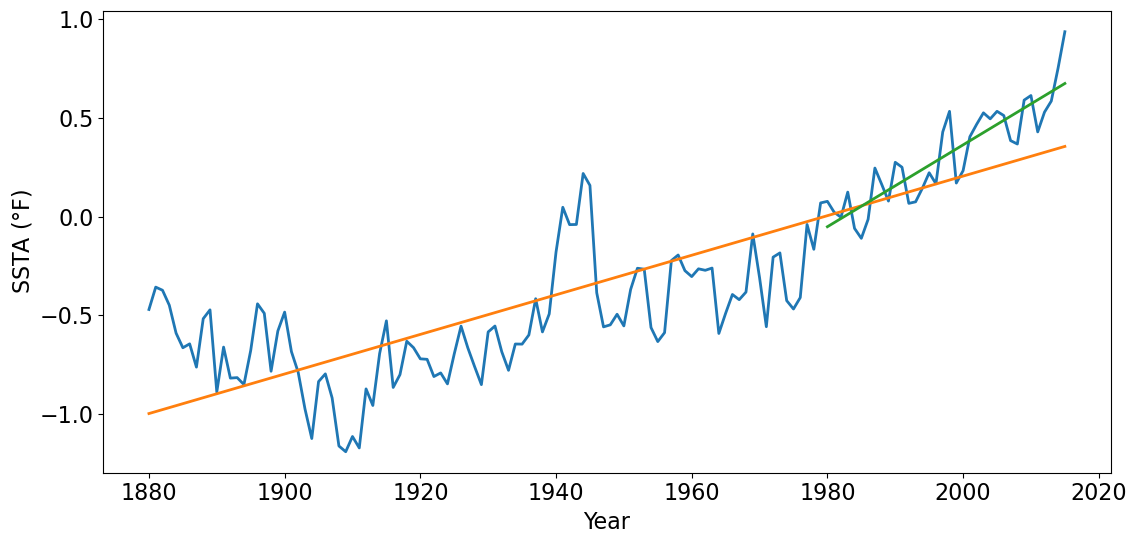

In [175]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980_on.slope*sst_ds.Year[100:] + ssta_trend_1980_on.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

In [251]:
sst_ds.Year[0:31]

<xarray.DataArray 'Year' (Year: 31)>
array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891,
       1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910], dtype=int64)
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 1906 1907 1908 1909 1910

In [253]:
sst_ds["Annual anomaly"][0:31]

<xarray.DataArray 'Annual anomaly' (Year: 31)>
array([-0.4700088, -0.3568788, -0.3726612, -0.448443 , -0.5897538,
       -0.6636546, -0.6439392, -0.7616232, -0.5166342, -0.4717926,
       -0.8875836, -0.6603264, -0.8173098, -0.8148276, -0.84978  ,
       -0.6772536, -0.4412844, -0.4894326, -0.78255  , -0.578736 ,
       -0.4833054, -0.6831072, -0.7883226, -0.9732618, -1.123038 ,
       -0.8347986, -0.795843 , -0.917685 , -1.160703 , -1.189773 ,
       -1.112769 ])
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 1906 1907 1908 1909 1910

In [255]:
ssta_trend_1880_to_1910 = stats.linregress(sst_ds.Year[0:31], sst_ds["Annual anomaly"][0:31])

In [257]:
ssta_trend_1880_to_1910

LinregressResult(slope=-0.01887870048387097, intercept=35.05394128790323, rvalue=-0.7300019717976662, pvalue=3.151512553799859e-06, stderr=0.0032821064264515463, intercept_stderr=6.219660957031161)

In [259]:
ssta_trend_1880_to_1910.slope

-0.01887870048387097

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\owhon\AppData\Local\Temp\ipykernel_6440\3070644506.py:6: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('SSTA ($\degree$F)')


Text(0, 0.5, 'SSTA ($\\degree$F)')

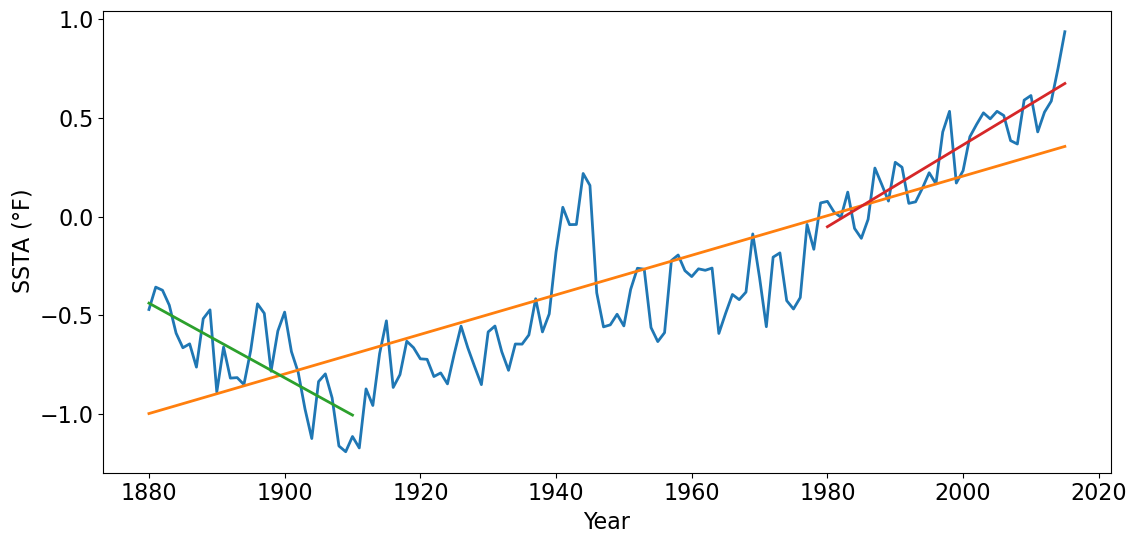

In [265]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[0:31], ssta_trend_1880_to_1910.slope*sst_ds.Year[0:31] + ssta_trend_1880_to_1910.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980_on.slope*sst_ds.Year[100:] + ssta_trend_1980_on.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

#### Detrending the data
Let's say we were interested in the variability outside of the trend. How do we detrend the data?

In [177]:
# First I am going to make the line, as I plotted before
trend_entire = ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept


In [179]:
# Then I will subtract the trend, the line
sst_detrended = sst_ds["Annual anomaly"] - trend_entire

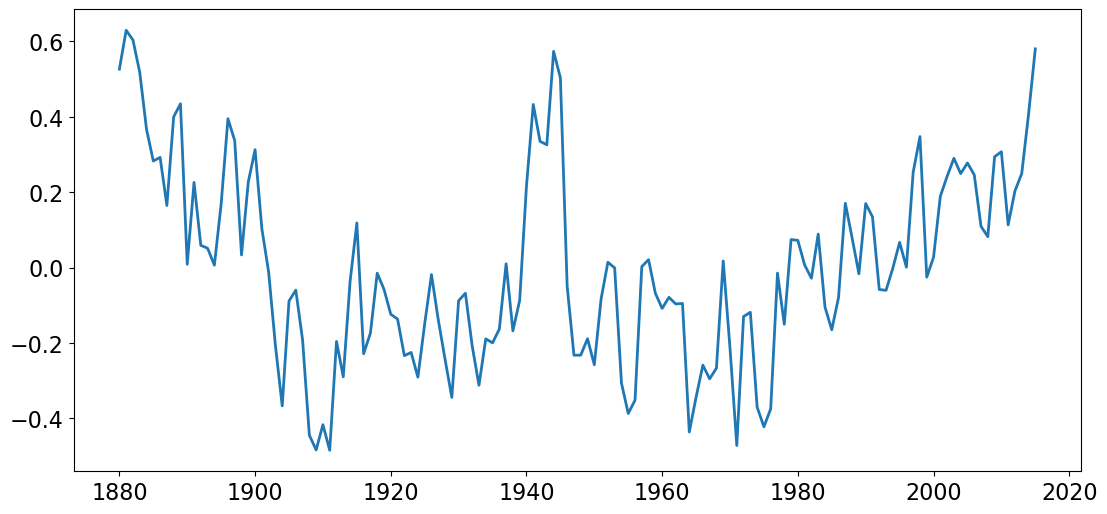

In [181]:
plt.plot(sst_ds.Year, sst_detrended)

#### Creating a moving average, i.e. filtering or smoothing.
Let's say we wanted to smooth the data to remove some of the variability, how would we do this?

I want to do a three year running mean, so for each datapoint, average the year before, the current year and the year after and save that to the current year as the new data.

if i is my current year index

(data[j+1] + data [j] + data [j-1])/3 to average the three years of data

Going to have to start at the second year, since I don't have a previous year


pseudo code:

create an array to save the new data in

Loop through all the years
 take a mean of the current, previous and next years, save to some new arrray


In [183]:
import numpy as np

In [185]:
sst_ds["Annual anomaly"].shape

(136,)

In [230]:
# initialize my array
ssta_filtered = np.zeros(136)

In [238]:
ssta_filtered

array([ 0.       , -0.3998496, -0.392661 , -0.470286 , -0.5672838,
       -0.6324492, -0.689739 , -0.6407322, -0.58335  , -0.6253368,
       -0.6732342, -0.7884066, -0.7641546, -0.8273058, -0.7806204,
       -0.656106 , -0.5359902, -0.571089 , -0.6169062, -0.6148638,
       -0.5817162, -0.6515784, -0.8148972, -0.9615408, -0.9770328,
       -0.9178932, -0.8494422, -0.958077 , -1.089387 , -1.154415 ,
       -1.1577162, -1.0517418, -0.9994074, -0.8402694, -0.7254816,
       -0.6950514, -0.7305318, -0.7649316, -0.697887 , -0.6712272,
       -0.7017474, -0.7504014, -0.7741902, -0.8156208, -0.7774104,
       -0.6984828, -0.6376662, -0.6591012, -0.7577646, -0.730929 ,
       -0.6625068, -0.6069534, -0.671682 , -0.7020222, -0.689259 ,
       -0.6296118, -0.5532168, -0.5326164, -0.4971444, -0.4185516,
       -0.2083398, -0.0577464, -0.0110928,  0.045882 ,  0.1120092,
       -0.0031734, -0.2618532, -0.4970154, -0.5332902, -0.5316978,
       -0.4719516, -0.3943236, -0.2986428, -0.3629202, -0.4866

In [232]:
for i in range(134): # loop through all the years, skip the last index
    #print(i+1) #skip the first index
    ssta_filtered[i+1] = (sst_ds["Annual anomaly"][i] + sst_ds["Annual anomaly"][i+1] + sst_ds["Annual anomaly"][i+2])/3

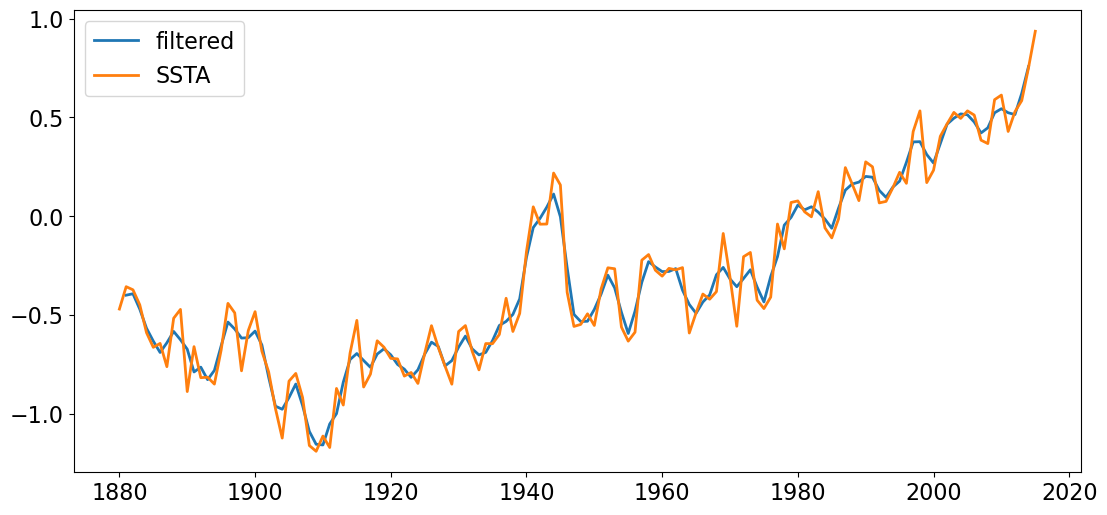

In [234]:
plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
plt.legend()

# Lab 12.1

**E.1** Define a datetime object that is your birthday. Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) Hint: see help(timedelta)

In [52]:
from datetime import datetime, timedelta

# Define your birthday as a datetime object
birthday = datetime(1986, 1, 26)

# a) Increment by ten weeks
birthday_plus_10_weeks = birthday + timedelta(weeks=10)

# b) Increment by five minutes
birthday_plus_5_minutes = birthday + timedelta(minutes=5)

# c) Increment by two years (manually adjusting the year)
try:
    birthday_plus_2_years = birthday.replace(year=birthday.year + 2)
except ValueError:
    # Handles February 29 cases on non-leap years by setting it to February 28
    birthday_plus_2_years = birthday.replace(year=birthday.year + 2, day=28)

birthday_plus_10_weeks, birthday_plus_5_minutes, birthday_plus_2_years


(datetime.datetime(1986, 4, 6, 0, 0),
 datetime.datetime(1986, 1, 26, 0, 5),
 datetime.datetime(1988, 1, 26, 0, 0))

**E.2** Define a daterange for your birthday every year of your life

In [73]:
from datetime import datetime, timedelta

birth_date = datetime(1986, 1, 26)
today = datetime.today()

# Calculate age
age = today.year - birth_date.year

# Generate birthday dates
birthday_dates = [(birth_date.year + i, datetime(birth_date.year + i, 1, 26).strftime('%Y-%m-%d')) 
                  for i in range(age + 1)]

print(birthday_dates)
hday_dates


[(1986, '1986-01-26'), (1987, '1987-01-26'), (1988, '1988-01-26'), (1989, '1989-01-26'), (1990, '1990-01-26'), (1991, '1991-01-26'), (1992, '1992-01-26'), (1993, '1993-01-26'), (1994, '1994-01-26'), (1995, '1995-01-26'), (1996, '1996-01-26'), (1997, '1997-01-26'), (1998, '1998-01-26'), (1999, '1999-01-26'), (2000, '2000-01-26'), (2001, '2001-01-26'), (2002, '2002-01-26'), (2003, '2003-01-26'), (2004, '2004-01-26'), (2005, '2005-01-26'), (2006, '2006-01-26'), (2007, '2007-01-26'), (2008, '2008-01-26'), (2009, '2009-01-26'), (2010, '2010-01-26'), (2011, '2011-01-26'), (2012, '2012-01-26'), (2013, '2013-01-26'), (2014, '2014-01-26'), (2015, '2015-01-26'), (2016, '2016-01-26'), (2017, '2017-01-26'), (2018, '2018-01-26'), (2019, '2019-01-26'), (2020, '2020-01-26'), (2021, '2021-01-26'), (2022, '2022-01-26'), (2023, '2023-01-26'), (2024, '2024-01-26')]


NameError: name 'hday_dates' is not defined

**E.3** Print all your birthdays out as month, day, year (no minutes, etc)

In [75]:
birth_date = datetime(1986, 1, 26)
today = datetime.today()
age = today.year - birth_date.year

for i in range(age + 1):
    print((datetime(birth_date.year + i, 1, 26)).strftime('%B %d, %Y'))

January 26, 1986
January 26, 1987
January 26, 1988
January 26, 1989
January 26, 1990
January 26, 1991
January 26, 1992
January 26, 1993
January 26, 1994
January 26, 1995
January 26, 1996
January 26, 1997
January 26, 1998
January 26, 1999
January 26, 2000
January 26, 2001
January 26, 2002
January 26, 2003
January 26, 2004
January 26, 2005
January 26, 2006
January 26, 2007
January 26, 2008
January 26, 2009
January 26, 2010
January 26, 2011
January 26, 2012
January 26, 2013
January 26, 2014
January 26, 2015
January 26, 2016
January 26, 2017
January 26, 2018
January 26, 2019
January 26, 2020
January 26, 2021
January 26, 2022
January 26, 2023
January 26, 2024


**E.4** Do a linear fit of the SSTA data from 1940 to 1970. What trend do you get? How confident are you in this result? How does it compare to the trends we did in lecture (use quantitative data to explain).

Method 1

In [267]:
sst_ds.Year[0:]

<xarray.DataArray 'Year' (Year: 136)>
array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891,
       1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015], dtype=int64)
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 2011 2012 2013 2014 2015

In [271]:
sst_ds.Year[60:91]

<xarray.DataArray 'Year' (Year: 31)>
array([1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970], dtype=int64)
Coordinates:
  * Year     (Year) int64 1940 1941 1942 1943 1944 ... 1966 1967 1968 1969 1970

In [273]:
ssta_trend_1940_to_1970 = stats.linregress(sst_ds.Year[60:91], sst_ds["Annual anomaly"][60:91])

In [275]:
ssta_trend_1940_to_1970

LinregressResult(slope=-0.008184913548387096, intercept=15.69453642580645, rvalue=-0.33625811590031707, pvalue=0.06437970871891731, stderr=0.00425683789714022, intercept_stderr=8.322205184880938)

In [277]:
ssta_trend_1940_to_1970.slope

-0.008184913548387096

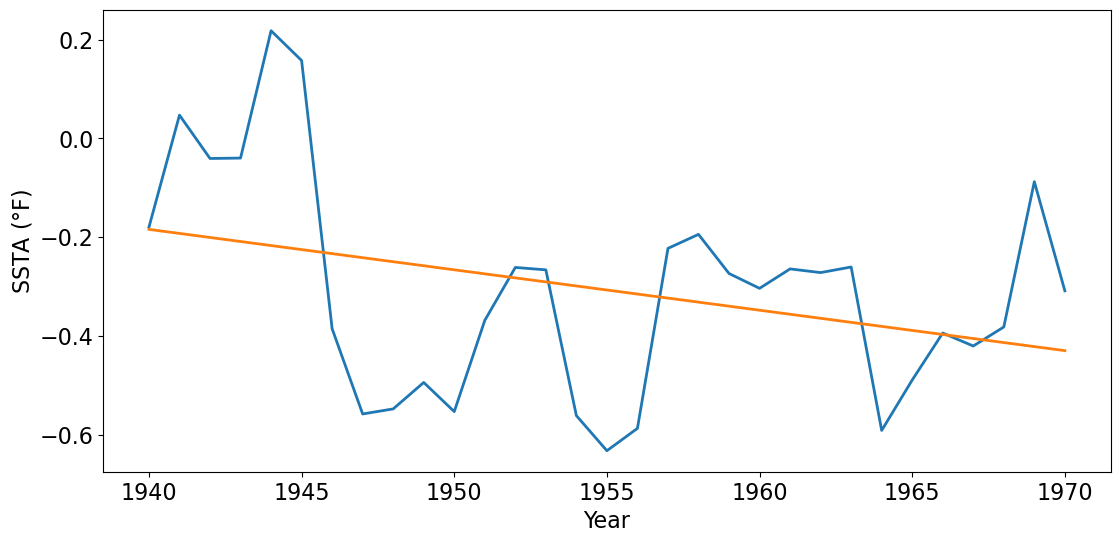

In [293]:
plt.plot(sst_ds.Year[60:91], sst_ds["Annual anomaly"][60:91])  # Ensure x and y lengths match
plt.plot(
    sst_ds.Year[60:91], 
    ssta_trend_1940_to_1970.slope * sst_ds.Year[60:91] + ssta_trend_1940_to_1970.intercept
)
plt.xlabel('Year')
plt.ylabel('SSTA ($\N{DEGREE SIGN}$F)')
plt.show()


Method 2

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load data
df = pd.read_csv('sea-surface-temp_fig-1.csv', encoding='latin1')

In [111]:
print(df.columns)

Index(['ï»¿Year', 'Annual anomaly', 'Lower 95% confidence interval',
       'Upper 95% confidence interval'],
      dtype='object')


In [226]:
#pd_trend = stats.linregress

In [228]:
#pd_trend

<function scipy.stats._stats_mstats_common.linregress(x, y=None, alternative='two-sided')>

Trend: -0.003494758064516129 °C/decade
R-squared: 0.02818534660586945
p-value: 0.3666521625475315


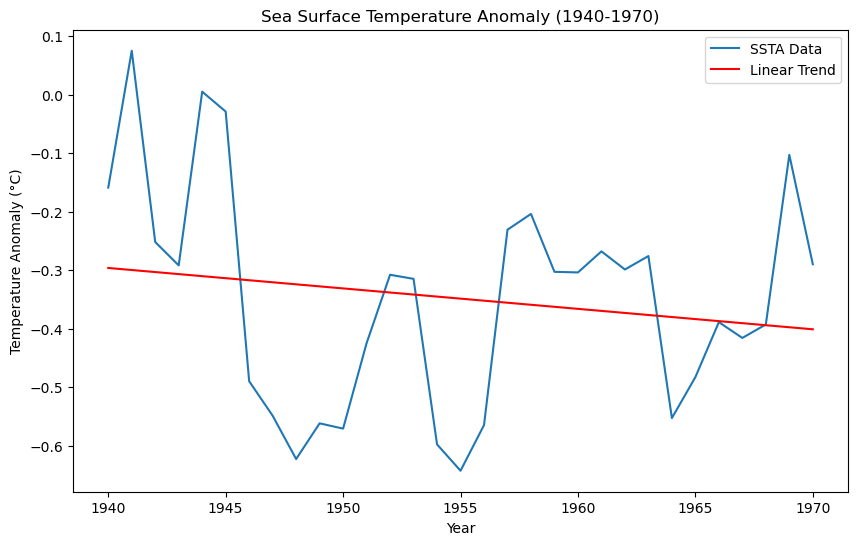

In [117]:

# Filter data (1940-1970)
df_filtered = df[(df.iloc[:, 0] >= 1940) & (df.iloc[:, 0] <= 1970)]
# Perform linear regression
years = df_filtered.iloc[:, 0]
anomalies = df_filtered.iloc[:, 1]

# Execute linregress function
result = linregress(years, anomalies)

# Extract coefficients
slope, intercept, r_value, p_value, std_err = result

# Print results
print("Trend:", slope, "°C/decade")
print("R-squared:", r_value**2)
print("p-value:", p_value)

plt.figure(figsize=(10, 6))
plt.plot(years, anomalies, label='SSTA Data')
plt.plot(years, intercept + slope * years, label='Linear Trend', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Sea Surface Temperature Anomaly (1940-1970)')
plt.legend()
plt.show()

What trend do you get? How confident are you in this result? 

#it gives a negative trend -0.003494758064516129, i.e. the temperature is reducing from 1940 to 1970

How does it compare to the trends we did in lecture (use quantitative data to explain)

the class data

In [307]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Define x and y data for the full dataset
x = sst_ds.Year
y = sst_ds["Annual anomaly"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the results
print(f"R-value (correlation coefficient): {r_value}")
print(f"Slope (trend): {slope}")
print(f"Intercept: {intercept}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


R-value (correlation coefficient): 0.8362694544139663
Slope (trend): 0.010013503267496782
Intercept: -19.822035179626454
P-value: 8.796275453011977e-37
Standard error: 0.0005671794277975704


home work data

In [301]:

x = sst_ds.Year[60:91]
y = sst_ds["Annual anomaly"][60:91]

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"R-value (correlation coefficient): {r_value}")
print(f"Slope (trend): {slope}")
print(f"Intercept: {intercept}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


R-value (correlation coefficient): -0.33625811590031707
Slope (trend): -0.008184913548387096
Intercept: 15.69453642580645
P-value: 0.06437970871891731
Standard error: 0.00425683789714022


1. Correlation Strength:
First trend shows a strong positive correlation (r = 0.836), suggesting a clear upward trend.
Second trend has a weak negative correlation (r = -0.336), indicating a weaker and less reliable downward trend.

2. Slope Comparison (Rate of Change):
First trend's slope is 0.0100, meaning there is an average increase of 0.0100 units per year.
Second trend's slope is −0.0082, meaning an average decrease of 0.0082 units per year.
Although the first trend's slope is slightly larger, both slopes are small, indicating gradual changes.

3. Statistical Significance (P-value):
First trend has an extremely small p-value (8.80 × 10−37), indicating high statistical significance.
Second trend has a p-value of 0.064, which is above the common significance threshold (0.05), meaning it may not be statistically significant.
Standard Error (Uncertainty of the Slope): First trend has a low standard error of 0.00057, indicating precise slope estimation.
Second trend has a larger standard error of 0.0043, suggesting greater uncertainty and less reliability in its trend estimate.

**E.5** According to the internet, what might have caused this decline in SST during this perioud? Write a few sentances explaining this and cite your sources here.

The decline in sea surface temperatures (SST) from around 1940 to 1970 is attributed primarily to two factors: increased atmospheric aerosols and data collection biases. During this period, industrial emissions of sulfate aerosols, primarily from the United States and Europe, increased significantly. These aerosols reflected sunlight back into space, leading to a cooling effect known as "global dimming" that partially offset greenhouse warming by reducing the amount of solar radiation reaching Earth’s surface. This cooling effect was particularly pronounced in the Northern Hemisphere, where most industrial pollution occurred.

Additionally, inconsistencies in SST measurements, such as temperature readings from different types of thermometers and collection methods (like buckets versus engine intake measurements), introduced errors. These differences in measurement practices and biases, particularly during and after World War II, impacted the accuracy of SST records until adjustments were made later. After the 1970s, declines in aerosol emissions due to environmental policies, alongside rising greenhouse gas levels, contributed to renewed SST warming.

Sources:

NASA Earth Observatory (earthobservatory.nasa.gov)
National Oceanography Centre (noc.ac.uk)
U.S. Environmental Protection Agency (epa.gov)

**E.6** Detrend from 1970 on and plot your result. Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

Detrend from 1970 on and plot your result

Method 1

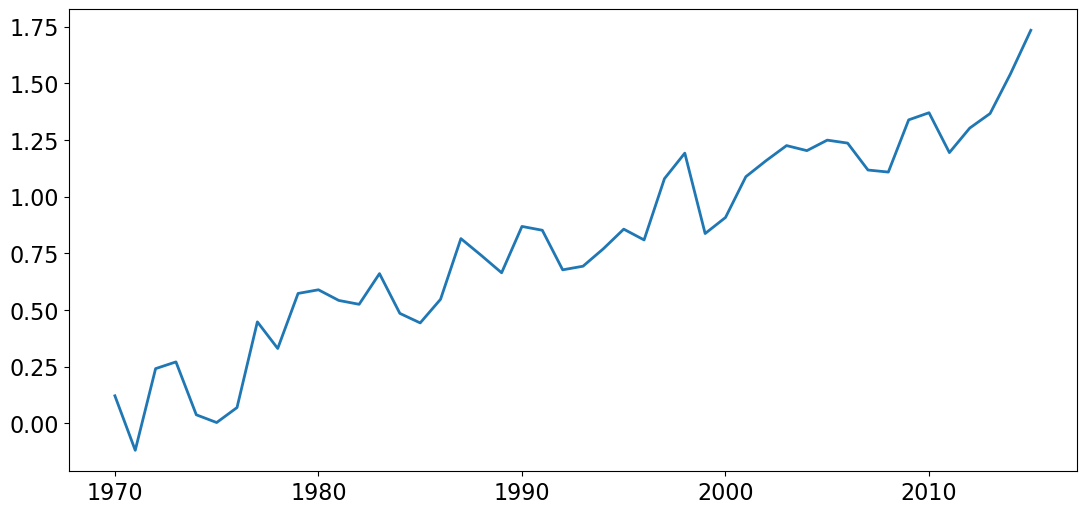

In [318]:
trend_1970_onwards = ssta_trend_1940_to_1970.slope * sst_ds.Year[90:] + ssta_trend_1940_to_1970.intercept
sst_detrended_1970_onwards = sst_ds["Annual anomaly"][90:] - trend_1970_onwards
plt.plot(sst_ds.Year[90:], sst_detrended_1970_onwards)

Method 2

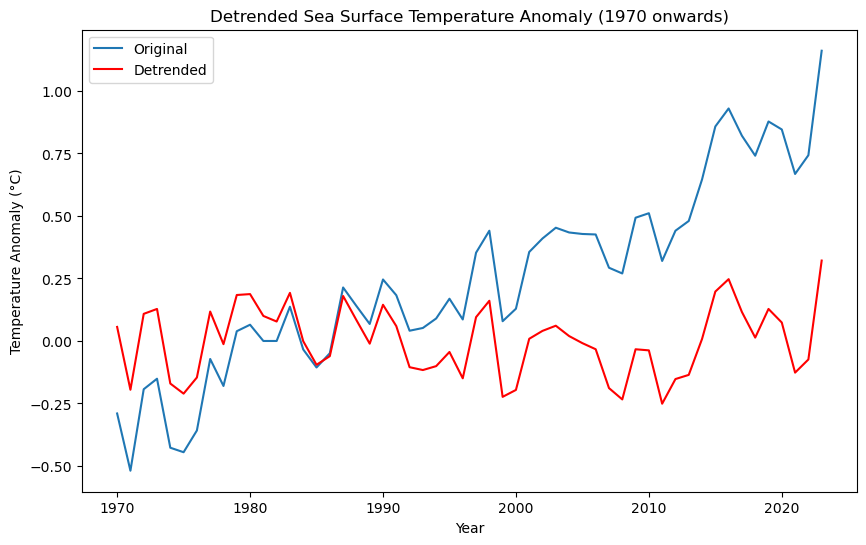

In [119]:
# Load data
df = pd.read_csv('sea-surface-temp_fig-1.csv')

# Filter data (1970 onwards)
df_detrend = df[df.iloc[:, 0] >= 1970].copy()

# Perform linear regression
years = df_detrend.iloc[:, 0]
anomalies = df_detrend.iloc[:, 1]

# Execute linregress function
result = linregress(years, anomalies)

# Extract coefficients
slope, intercept, r_value, p_value, std_err = result

# Detrend data
df_detrend['Detrended'] = anomalies - (slope * years + intercept)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(years, anomalies, label='Original')
plt.plot(years, df_detrend['Detrended'], label='Detrended', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Detrended Sea Surface Temperature Anomaly (1970 onwards)')
plt.legend()
plt.show()

Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

The El Niño-Southern Oscillation (ENSO) index is an important measure of interannual variability in global climate and particularly in Sea Surface Temperatures (SSTs). Comparing a detrended SST dataset from 1970 onward to an ENSO index (such as the Niño 3.4 or Oceanic Niño Index) can reveal whether interannual variability in the SSTs aligns with ENSO events. Here’s a deeper look at how ENSO affects SST and possible causes of interannual variability:

Steps for Comparison
Data Preparation:

Use a standardized ENSO index (such as the Niño 3.4 or ONI) during the same period (1970 onwards).
Calculate the correlation between the ENSO index and the detrended SSTs to quantify the relationship.
Visualization:

Plot the ENSO index against the detrended SST anomalies.
Highlight periods corresponding to El Niño and La Niña events and examine any synchronous rises or falls in SSTs.
Analysis:

Analyze whether warmer or cooler SSTs align with known El Niño (warm phase) or La Niña (cool phase) events.
Interpret any leads or lags in SST changes in response to ENSO phases.
How ENSO Affects SST and Possible Causes of Variability
ENSO Mechanism
ENSO influences SSTs in the Pacific Ocean and beyond through complex interactions between atmospheric and oceanic processes:

El Niño (Warm Phase):

During El Niño events, the central and eastern Pacific Ocean warms, increasing SSTs across large regions. This is caused by weakened trade winds, allowing warm surface water to move eastward.
The warming leads to changes in atmospheric pressure and wind patterns, which can disrupt global weather patterns, causing wetter conditions in the Americas and drier ones in Australia and Southeast Asia.
La Niña (Cool Phase):

During La Niña events, stronger trade winds increase upwelling of cooler, deeper waters along the equator, particularly off the coast of South America. This results in lower SSTs across the central and eastern Pacific.
La Niña tends to bring wetter conditions to Australia and Indonesia and drier conditions to parts of the Americas.
Causes of Interannual Variability
The interannual variability in SSTs can be influenced by multiple factors:

ENSO Events: El Niño and La Niña cycles generally dominate interannual SST variability. Positive phases (El Niño) correspond to SST warming, while negative phases (La Niña) are linked to cooling.
Ocean-Atmosphere Interactions: The tropical Pacific ocean-atmosphere system is highly sensitive, and minor changes in wind or ocean currents can amplify or suppress SST variations.
Volcanic Activity: Large volcanic eruptions can inject aerosols into the stratosphere, which can temporarily cool the climate, affecting SSTs. For instance, the 1991 eruption of Mount Pinatubo led to global cooling and an impact on SSTs.
Anthropogenic Climate Change: While longer-term trends are filtered out by detrending, climate change can still contribute to baseline temperature increases and affect the frequency or intensity of ENSO events, indirectly impacting interannual SST variability.
Speculation on ENSO and SST Relationship
ENSO events tend to drive significant SST variability, particularly in the equatorial Pacific. If a positive correlation is found between detrended SST anomalies and ENSO indices, it suggests that the variability in SST from 1970 onward is likely due in large part to ENSO phases. Conversely, if no strong correlation exists, this may imply that other factors, such as regional atmospheric patterns or oceanic currents, are influencing the observed SST variability.

Summary
ENSO is a major driver of interannual SST variability, causing significant warming during El Niño events and cooling during La Niña events. Understanding the relationship between SST anomalies and the ENSO index from 1970 onward can provide insights into how these natural cycles contribute to temperature variations across oceans, influencing weather and climate patterns globally.

**E.7** Perform a five year moving average of your detrended data from E.6. Explain your result in relation to the periodicity of ENSO.

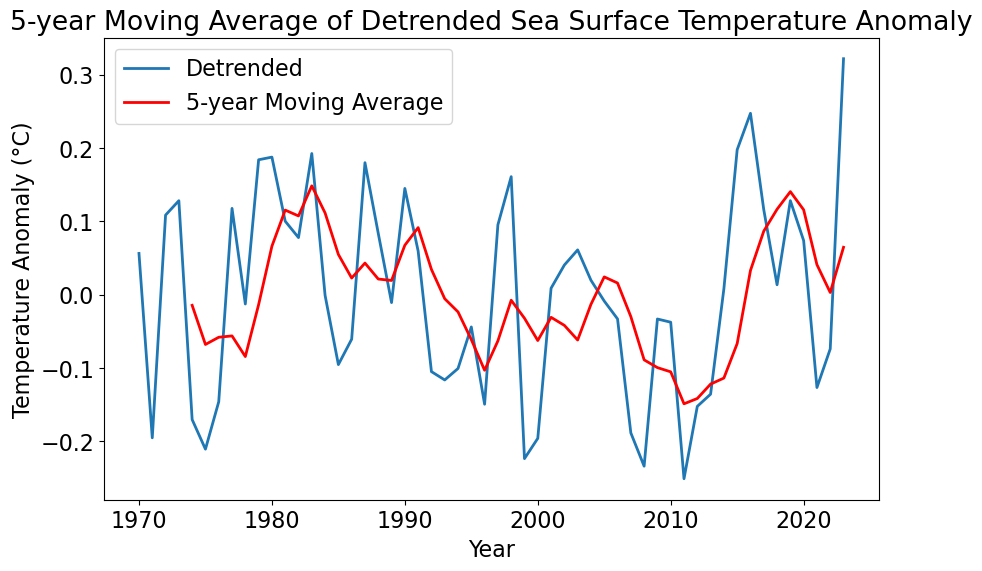

In [325]:
# Filter data (1970 onwards)
df_detrend = df[df.iloc[:, 0] >= 1970].copy()

# Perform linear regression
years = df_detrend.iloc[:, 0]
anomalies = df_detrend.iloc[:, 1]

# Execute linregress function
result = linregress(years, anomalies)

# Extract coefficients
slope, intercept, r_value, p_value, std_err = result

# Detrend data
df_detrend['Detrended'] = anomalies - (slope * years + intercept)

# 5-year moving average
df_detrend['Moving Average'] = df_detrend['Detrended'].rolling(window=5).mean()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(years, df_detrend['Detrended'], label='Detrended')
plt.plot(years, df_detrend['Moving Average'], label='5-year Moving Average', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('5-year Moving Average of Detrended Sea Surface Temperature Anomaly')

plt.savefig('saved_image.png')
plt.legend()
plt.show()




Trend: There is a clear upward trend in the sea surface temperature anomaly over the period shown. This indicates a warming trend in the ocean.

Fluctuations: Superimposed on this trend, there are significant fluctuations in the temperature anomaly. These fluctuations represent the natural variability of the climate system.

ENSO Signal: The most prominent fluctuations in the graph are likely related to the El Niño-Southern Oscillation (ENSO). ENSO is a complex climate pattern involving changes in sea surface temperatures and atmospheric pressure across the tropical Pacific. It has a significant impact on global weather patterns.

ENSO Periodicity and the Graph:

ENSO is known to have a periodicity of around 2-7 years, with major events occurring every 3-5 years. This is evident in the graph as the most prominent fluctuations have a similar timescale.

**Notes** Make notes for yourself on progamming tecniques and commands you learned in the this week, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.